In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [4]:
df = pd.read_csv("/Users/katiexn/Desktop/Data Science/Python/Sentiment Analysis/Womens-Clothing-E-Commerce-Reviews.csv")

In [5]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [6]:
df.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23488.000000  23488.000000  23488.000000  23488.000000   
mean   11743.500000    918.130109     43.197931      4.196100   
std     6780.545897    203.294501     12.279256      1.110008   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.750000    861.000000     34.000000      4.000000   
50%    11743.500000    936.000000     41.000000      5.000000   
75%    17615.250000   1078.000000     52.000000      5.000000   
max    23487.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23488.000000             23488.000000  
mean          0.822377                 2.537551  
std           0.382203                 5.704645  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [7]:
df.shape

(23488, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23488 entries, 0 to 23487
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23488 non-null  int64 
 1   Clothing ID              23488 non-null  int64 
 2   Age                      23488 non-null  int64 
 3   Title                    19678 non-null  object
 4   Review Text              22643 non-null  object
 5   Rating                   23488 non-null  int64 
 6   Recommended IND          23488 non-null  int64 
 7   Positive Feedback Count  23488 non-null  int64 
 8   Division Name            23474 non-null  object
 9   Department Name          23474 non-null  object
 10  Class Name               23474 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
df.drop(labels =['Clothing ID','Title'],axis=1, inplace = True)

In [10]:
df[df['Review Text'].isnull()]

Unnamed: 0  Age Review Text  Rating  Recommended IND  \
92             92   23         NaN       5                1   
93             93   31         NaN       5                1   
98             98   50         NaN       5                1   
135           135   35         NaN       4                1   
142           142   35         NaN       5                1   
...           ...  ...         ...     ...              ...   
23258       23258   35         NaN       4                1   
23301       23301   52         NaN       5                1   
23303       23303   46         NaN       5                1   
23470       23470   39         NaN       5                1   
23480       23480   35         NaN       5                1   

       Positive Feedback Count   Division Name Department Name Class Name  
92                           0  General Petite            Tops      Knits  
93                           0         General         Dresses    Dresses  
98                           0         General         Jackets  Outerwear  
135                          0  General Petite            Tops      Knits  
142                          0         General         Jackets  Outerwear  
...                        ...             ...             ...        ...  
23258                        0         General            Tops      Knits  
23301                        0         General            Tops      Knits  
23303                        0         General            Tops    Blouses  
23470                        0  General Petite         Dresses    Dresses  
23480                        0  General Petite            Tops      Knits  

[845 rows x 9 columns]

In [11]:
df = df[~df['Review Text'].isnull()]

In [12]:
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful - silky and sexy and comf...       4   
1           1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [13]:
df.shape

(22643, 9)

In [74]:
product_rating = px.histogram(df,x="Rating")
product_rating.update_traces(marker_color="lightpink",marker_line_color='rgb(201, 83, 122)',
                  marker_line_width=1.5)
product_rating.update_layout(title_text='Product Rating')
product_rating.show()

In [15]:
age_histogram = px.histogram(df,x='Age')
age_histogram.update_traces(marker_color='turquoise',marker_line_color='rgb(25, 86, 89)',
                  marker_line_width=1)
age_histogram.update_layout(title_text='Age Distribution')
age_histogram.show()

In [119]:
class_name_hist = px.histogram(df,x='Class Name')
class_name_hist.update_traces(marker_color='turquoise',marker_line_color='rgb(25, 86, 89)',
                  marker_line_width=1.5)
class_name_hist.update_layout(title_text='Class Name Distribution')
class_name_hist.show()

In [120]:
fig = px.histogram(df,x='Department Name')
fig.update_traces(marker_color='turquoise',marker_line_color='rgb(25, 86, 89)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Department Name Distribution')
fig.show()

In [121]:
fig = px.histogram(df,x='Division Name')
fig.update_traces(marker_color='turquoise',marker_line_color='rgb(25, 86, 89)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Division Name Distribution')
fig.show()

In [20]:
df['Review Length'] = df['Review Text'].apply(len)

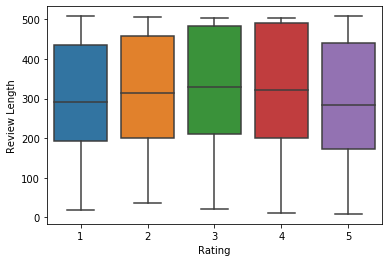

In [21]:
sns.boxplot(x='Rating', y='Review Length', data=df)

In [75]:
x = df['Recommended IND'].value_counts()
colors= ['lightpink','powderblue']
trace = go.Pie(labels=x.index,values=x, textinfo='value',marker=dict(colors=colors,line=dict(color='black',width=1)))
layout= go.Layout(title='Recommendation Ration on Women Clothing')
fig= go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [76]:
recommended = df[df['Recommended IND']==1]
not_recommended = df[df['Recommended IND']==0]

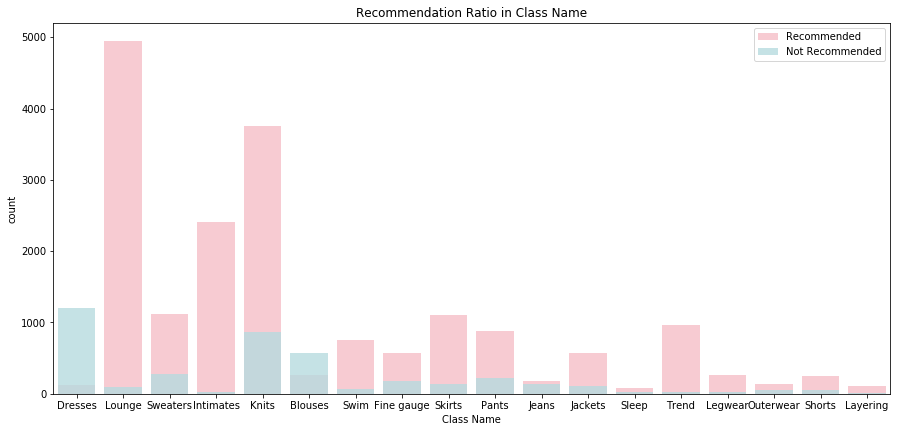

In [77]:
fig = plt.figure(figsize=(15,15))
plot1 = plt.subplot2grid((2,2),(0,0),colspan=4)
plot1 = sns.countplot(recommended['Class Name'], color='lightpink', alpha=0.8, label='Recommended')
plot1 = sns.countplot(not_recommended['Class Name'],color = 'powderblue',alpha=0.8, label='Not Recommended')
plot1 = plt.title('Recommendation Ratio in Class Name')
plot1 = plt.legend()

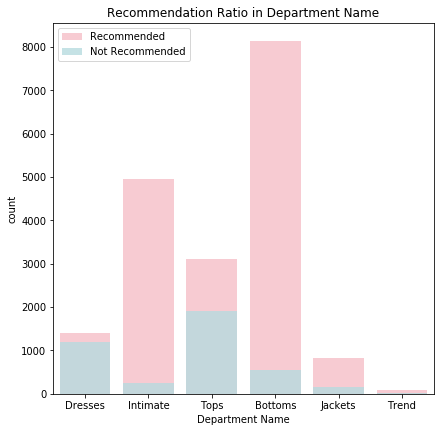

In [78]:
fig = plt.figure(figsize=(15,15))
plot2 = plt.subplot2grid((2,2),(0,0))
plot2 = sns.countplot(recommended['Department Name'],color='lightpink', alpha=0.8, label='Recommended')
plot2 = sns.countplot(not_recommended['Department Name'],color = 'powderblue',alpha=0.8, label='Not Recommended')
plot2 = plt.title('Recommendation Ratio in Department Name')
plot2 = plt.legend()

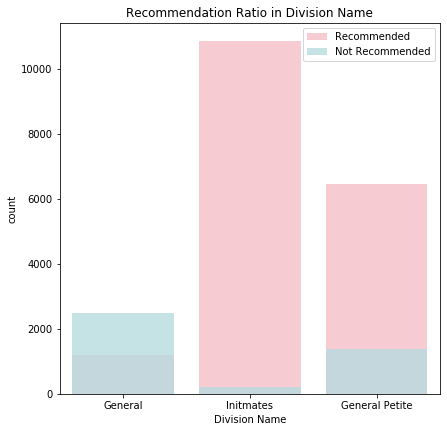

In [79]:
fig = plt.figure(figsize=(15,15))
plot3 = plt.subplot2grid((2,2),(0,0))
plot3 = sns.countplot(recommended['Division Name'],color='lightpink', alpha=0.8, label='Recommended')
plot3 = sns.countplot(not_recommended['Division Name'],color = 'powderblue',alpha=0.8, label='Not Recommended')
plot3 = plt.title('Recommendation Ratio in Division Name')
plot3 = plt.legend()

In [83]:
df.groupby(['Rating','Recommended IND'])['Recommended IND'].count()


Rating  Recommended IND
1       0                    806
        1                     15
2       0                   1455
        1                     94
3       0                   1653
        1                   1170
4       0                    164
        1                   4744
5       0                     23
        1                  12519
Name: Recommended IND, dtype: int64

In [85]:
pip install TextBlob

     |████████████████████████████████| 636 kB 6.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
from textblob import *

In [90]:
df['Polarity'] = df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Polarity']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23483    0.414286
23484    0.322222
23485    0.413889
23486    0.000000
23487    0.500000
Name: Polarity, Length: 22643, dtype: float64

In [92]:
polarity_hist = px.histogram(df, x='Polarity')
polarity_hist.update_traces(marker_color='turquoise')
polarity_hist.update_layout(title_text='Polarity Distribution')
polarity_hist.show()

In [95]:
pos = df.loc[df.Polarity == 1,['Review Text']].sample(5).values
for i in pos:
    print(i[0])

So comfortable-so versatile-so perfect
So beautiful! i got the xs and it fits tts! it goes with everything! perfect weekend addition!
This is so flowing and perfect to hide any flaws.i adore it!
Dress is awesome and makes you look skinnier.
This is a great blouse for all shapes!   you can wear it under a suit or with jeans!


In [96]:
neu = df.loc[df.Polarity == 0.5,['Review Text']].sample(5).values
for i in neu:
    print(i[0])

This blouse does have a flowy, boxy shape to it but the details make up for that. when i wear it tucked into a skirt it looks wonderfully flattering. i tried on an xs and considered looking for a xxs but i feel that size would probably end up being too short instead of more fitted.
I'm 5'0, 125 lbs, and 34d, i ordered a 6p and it fits perfectly. the color is more of a bronze mixed with gold and chocolate. the picture does not do it justice.
This shirt is wonderful! i totally recommend it for everyone.
I liked the idea of this t-shirt dress for a great basic wardrobe staple; however, i feel that it was overpriced for the quality. it's a nice piece but i would wait for it to go on sale.
Love the weight. something i can wear winter and spring.


In [101]:
neg = df.loc[df.Polarity < 0,['Review Text']].sample(5).values
for i in neg:
    print(i[0])

So bummed. i was really hoping this top would work for me. i got the black in regular size 4 and the pink in petite size 4. both hit my breast too high and were too bulky in the mid section. i have a sort of short torso, wear a small 34c, and am have a defined waist. when tops are bulky, it gives me no shape and just looks terrible. i am having the hardest time finding pretty tops that suit my figure. they did not lie flat like on the model but had so much extra fabric they stuck out.
the constr
I was really disappointed when this arrived and i discovered that it's basically see-through.  it's well constructed, it's just a really thin material.
Hate i have to return it - way too long-almost more mid thigh/almost dress length.
Love the material -- it is a thick cotton, but it is structured enough and thick enough so that it doesn't cling to me (in a bad way). its like wearing a sweater. my only beef with it is that the seam where the black material is stitched to the gray material creat

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
def get_top_words(corpus,n = 'None', ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range =(ngram,ngram)).fit(corpus)
    bags_of_words = vec.transform(corpus)
    sum_of_words = bags_of_words.sum(axis =0)
    words_freq = [(word,sum_of_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

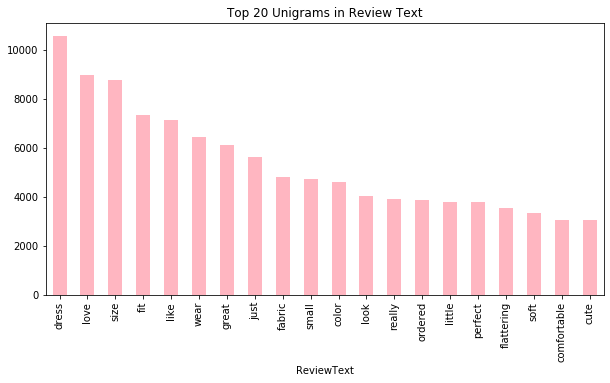

In [117]:
common_words = get_top_words(df['Review Text'],20,1)
unigrams_plot = pd.DataFrame(common_words, columns=['ReviewText','count'])
plt.figure(figsize = (10,5))
unigrams_plot.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='lightpink',title='Top 20 Unigrams in Review Text')

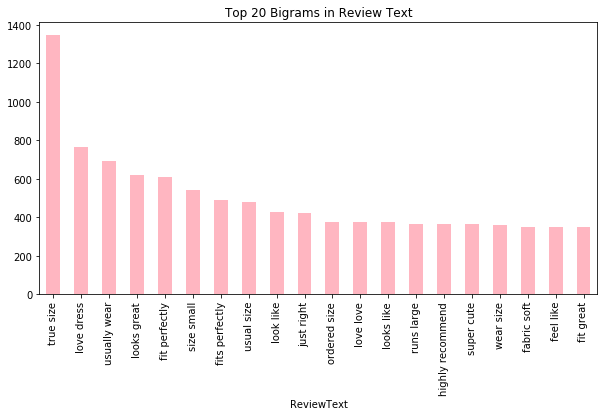

In [116]:
common_words = get_top_words(df['Review Text'],20,2)
bigrams_plot = pd.DataFrame(common_words, columns=['ReviewText','count'])
plt.figure(figsize = (10,5))
bigrams_plot.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='lightpink',
                                                                                    title='Top 20 Bigrams in Review Text')

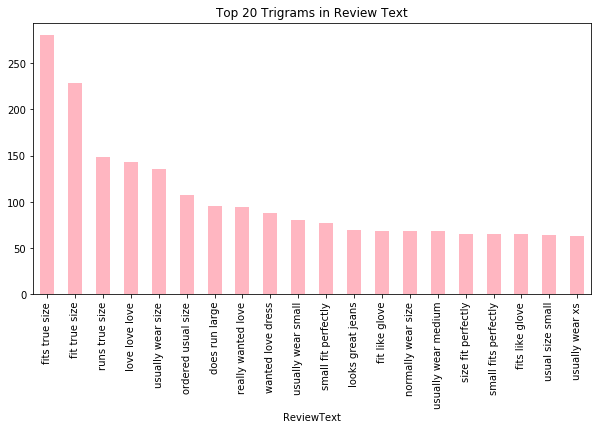

In [123]:
common_words = get_top_words(df['Review Text'],20,3)
Trigrams_plot = pd.DataFrame(common_words, columns=['ReviewText','count'])
plt.figure(figsize = (10,5))
Trigrams_plot.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='lightpink',title='Top 20 Trigrams in Review Text')

In [124]:
from wordcloud import WordCloud

In [141]:
pos_data = df[df['Recommended IND'] == 1]
pos_data = pos_data['Review Text']
neg_data = df[df['Recommended IND'] == 0]
neg_data = neg_data['Review Text']

def drawing(df, color='white'):
    words = ' '.join(df)
    clean_word = ' '.join([i for i in words.split()
                          if(i!='clothes' and i!='shop')])
    drawing = WordCloud(stopwords=stop,
                      background_color=color,
                      width=3000,
                      height=2000
                     ).generate(clean_word)
    plt.figure(2,figsize=(10,8))
    plt.imshow(drawing)
    plt.axis('off')
    plt.show()

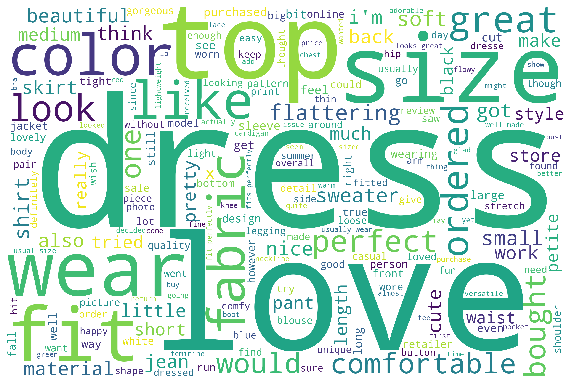

In [136]:
drawing(pos_data,'white')

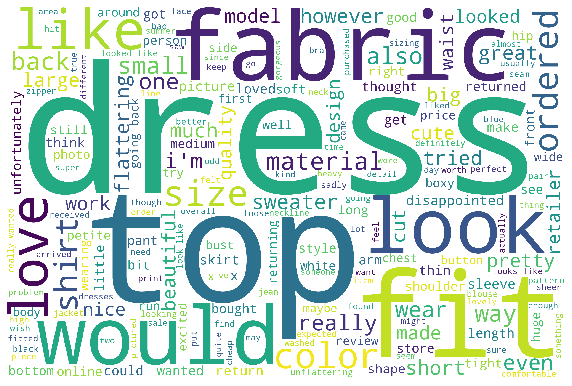

In [142]:
drawing(neg_data,'white')